In [1]:
import pandas as pd
import numpy as np
#import required libaries

In [2]:
import chardet
cities = pd.read_json(r'C:\Users\prakruthi\Desktop\yogesh\cities.json')
with open(r'C:\Users\prakruthi\Desktop\yogesh\crimedata.csv', 'rb') as t:
    res = chardet.detect(t.read())
res
#importing json file

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [3]:
df = pd.read_csv(r'C:\Users\prakruthi\Desktop\yogesh\crimedata.csv', encoding=res['encoding'])
df.columns = ['communityname'] + list(df.columns[1:])
df = df.replace(to_replace='?', value=np.nan)
#importing csv file

In [4]:
df.head()   #retrieve first 5 rows

communityname state countyCode communityCode  fold  population  \
0  BerkeleyHeightstownship    NJ         39          5320     1       11980   
1           Marpletownship    PA         45         47616     1       23123   
2               Tigardcity    OR        NaN           NaN     1       29344   
3         Gloversvillecity    NY         35         29443     1       16656   
4              Bemidjicity    MN          7          5068     1       11245   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  burglaries  \
0           3.10          1.37         91.78          6.50  ...          14   
1           2.82          0.80         95.57          3.44  ...          57   
2           2.43          0.74         94.33          3.43  ...         274   
3           2.40          1.70         97.35          0.50  ...         225   
4           2.76          0.53         89.16          1.17  ...          91   

   burglPerPop  larcenies  larcPerPop  autoTheft  autoTheftPerPop  arsons  \
0       114.85        138     1132.08         16           131.26       2   
1       242.37        376     1598.78         26           110.55       1   
2       758.14       1797     4972.19        136            376.3      22   
3      1301.78        716     4142.56         47           271.93     NaN   
4       728.93       1060     8490.87         91           728.93       5   

   arsonsPerPop  ViolentCrimesPerPop  nonViolPerPop  
0         16.41                41.02        1394.59  
1          4.25               127.56        1955.95  
2         60.87               218.59        6167.51  
3           NaN               306.64            NaN  
4         40.05                  NaN        9988.79  

[5 rows x 147 columns]

In [5]:
nan_columns = []
for col in df.columns:
    if df[col].isna().sum() > 0.0:
        nan_columns.append(col)
        print('dtype={1} uniques={2} nans_percent={3} {0}'.format(col,df[col].dtype, len(df[col].unique()), 100*df[col].isna().sum()/df.shape[0]))
    
    #obtaining type,unique value,nan percent for each column 

dtype=object uniques=115 nans_percent=55.12415349887133 countyCode
dtype=object uniques=960 nans_percent=55.25959367945824 communityCode
dtype=object uniques=1918 nans_percent=0.045146726862302484 OtherPerCap
dtype=object uniques=221 nans_percent=84.51467268623024 LemasSwornFT
dtype=object uniques=344 nans_percent=84.51467268623024 LemasSwFTPerPop
dtype=object uniques=216 nans_percent=84.51467268623024 LemasSwFTFieldOps
dtype=object uniques=343 nans_percent=84.51467268623024 LemasSwFTFieldPerPop
dtype=object uniques=320 nans_percent=84.51467268623024 LemasTotalReq
dtype=object uniques=344 nans_percent=84.51467268623024 LemasTotReqPerPop
dtype=object uniques=337 nans_percent=84.51467268623024 PolicReqPerOffic
dtype=object uniques=323 nans_percent=84.51467268623024 PolicPerPop
dtype=object uniques=318 nans_percent=84.51467268623024 RacialMatchCommPol
dtype=object uniques=318 nans_percent=84.51467268623024 PctPolicWhite
dtype=object uniques=289 nans_percent=84.51467268623024 PctPolicBlack

In [6]:
for col in nan_columns:
    try:
        df.loc[~df[col].isna(), col] = df[~df[col].isna()][col].astype('int')
    except Exception as e:
        df.loc[~df[col].isna(), col] = df[~df[col].isna()][col].astype('float')
#checking nan values for type float and int

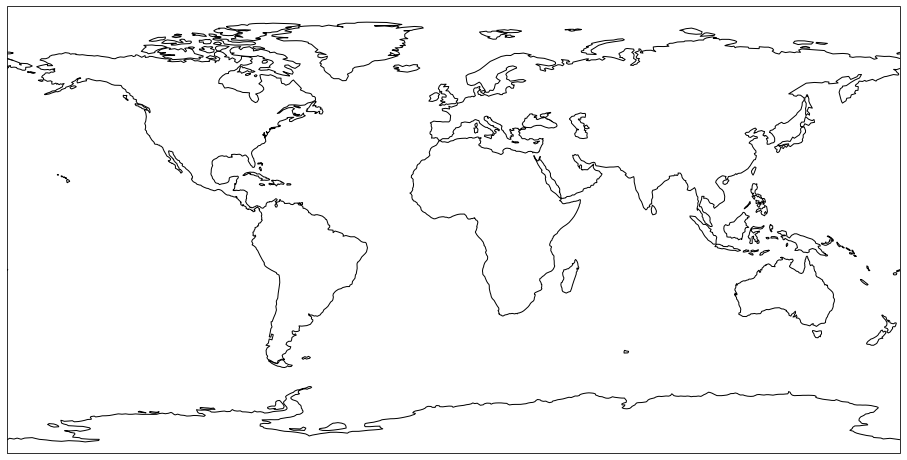

In [7]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,16))
ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.show()
#the view of the country UK

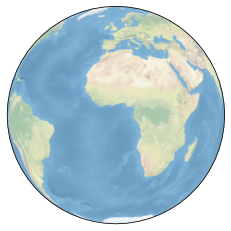

In [8]:
ax=plt.axes(projection=ccrs.Orthographic())
ax.stock_img()
plt.show()
#the globular view

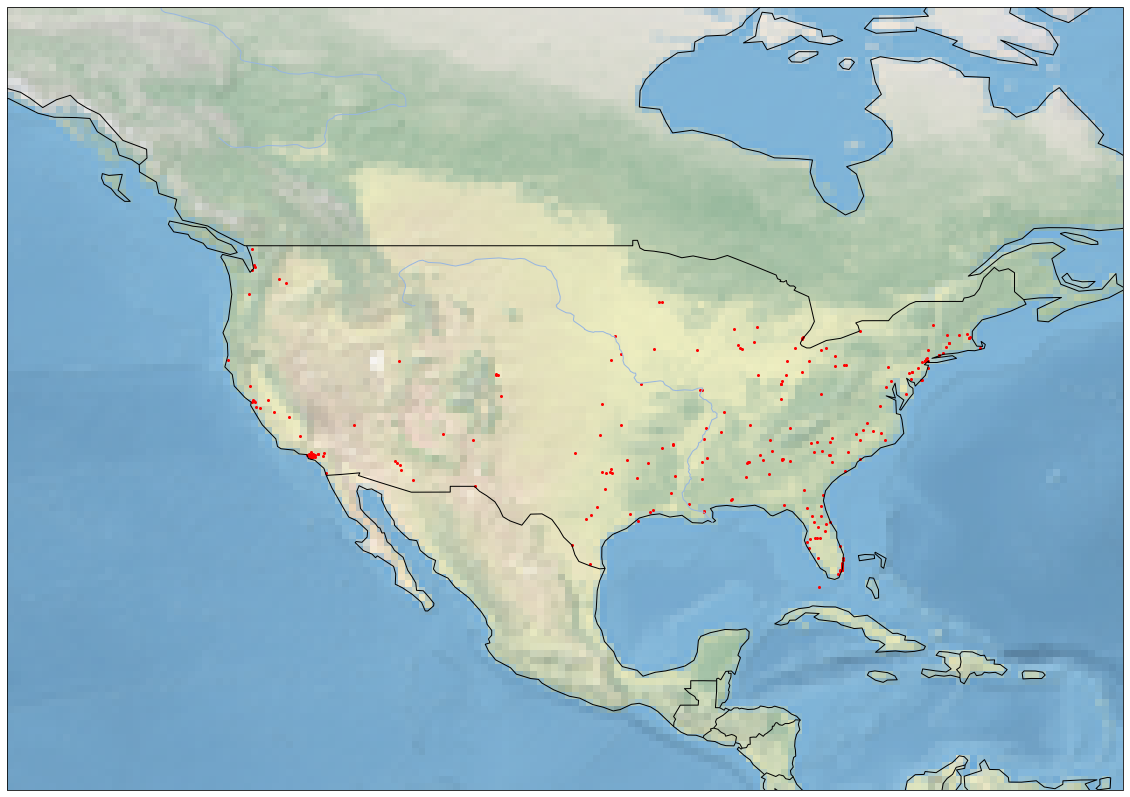

In [9]:
import cartopy.feature as fs

ax = plt.figure(figsize=(20,20)).add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent((-140,-60,10,60))#left right bottom top
ax.add_feature(fs.BORDERS)
ax.add_feature(fs.COASTLINE)
ax.add_feature(fs.RIVERS)
ax.scatter(cities['longitude'], cities['latitude'], s=4, color='red')
ax.stock_img()
plt.show()
#by considering the lat and long in cities.json we plot using cartopy library in the map

In [10]:
df.head()

communityname state countyCode communityCode  fold  population  \
0  BerkeleyHeightstownship    NJ         39          5320     1       11980   
1           Marpletownship    PA         45         47616     1       23123   
2               Tigardcity    OR        NaN           NaN     1       29344   
3         Gloversvillecity    NY         35         29443     1       16656   
4              Bemidjicity    MN          7          5068     1       11245   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  burglaries  \
0           3.10          1.37         91.78          6.50  ...          14   
1           2.82          0.80         95.57          3.44  ...          57   
2           2.43          0.74         94.33          3.43  ...         274   
3           2.40          1.70         97.35          0.50  ...         225   
4           2.76          0.53         89.16          1.17  ...          91   

   burglPerPop  larcenies  larcPerPop  autoTheft  autoTheftPerPop  arsons  \
0       114.85        138     1132.08         16           131.26       2   
1       242.37        376     1598.78         26           110.55       1   
2       758.14       1797     4972.19        136            376.3      22   
3      1301.78        716     4142.56         47           271.93     NaN   
4       728.93       1060     8490.87         91           728.93       5   

   arsonsPerPop  ViolentCrimesPerPop  nonViolPerPop  
0         16.41                41.02        1394.59  
1          4.25               127.56        1955.95  
2         60.87               218.59        6167.51  
3           NaN               306.64            NaN  
4         40.05                  NaN        9988.79  

[5 rows x 147 columns]

In [11]:
df.columns #column names

Index(['communityname', 'state', 'countyCode', 'communityCode', 'fold',
       'population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian',
       ...
       'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft',
       'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'ViolentCrimesPerPop',
       'nonViolPerPop'],
      dtype='object', length=147)

In [12]:
df.shape  #no of rows and columns in the dataset

(2215, 147)

In [13]:
print(df['ViolentCrimesPerPop'].min(),
      df['ViolentCrimesPerPop'].max(),
      df['ViolentCrimesPerPop'].mean(),
      df['ViolentCrimesPerPop'].std(),
      df['ViolentCrimesPerPop'].median())
#calculating statistical metrics of the target variable

0.0 4877.06 589.0789217652964 614.7845182453365 374.06


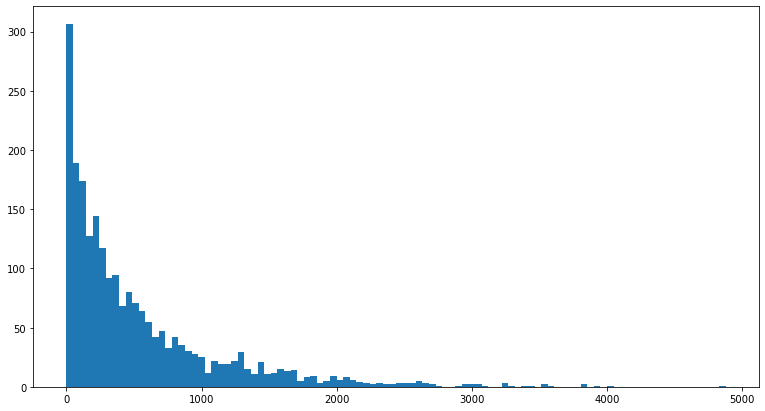

In [14]:
plt.figure(figsize=(13,7))
plt.hist(df['ViolentCrimesPerPop'].fillna(-1), bins=100)
plt.show()
#distribution of the target variable is rightly skewed

<ipython-input-15-b4ea0586161d>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  top10longitude = pd.Series(); top10latitude = pd.Series()


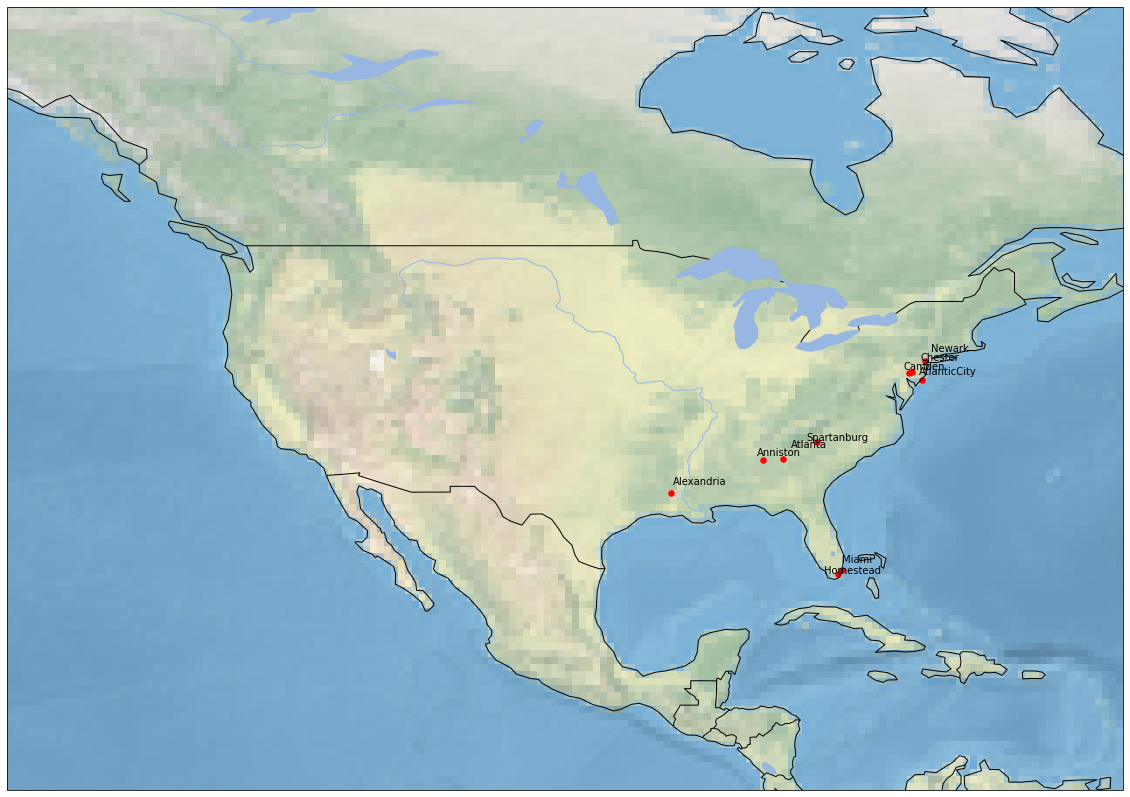

In [15]:
ax = plt.figure(figsize=(20,20)).add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent((-140,-60,10,60))#left right bottom top
ax.add_feature(fs.BORDERS)
ax.add_feature(fs.COASTLINE)
ax.add_feature(fs.RIVERS)
ax.add_feature(fs.LAKES)
top10crimes = df[~df['ViolentCrimesPerPop'].isna()]['ViolentCrimesPerPop'].sort_values()[-10:]
top10cities = df.iloc[top10crimes.index, 0]
# removing last 4 letters (Citynamecity --> Cityname)
top10cities = list(map(lambda x: x[:-4], top10cities))
# collecting coordinates of each city
top10longitude = pd.Series(); top10latitude = pd.Series()
for i, city in enumerate(top10cities):
    lon = cities[cities['city'] == city]['longitude']
    lat = cities[cities['city'] == city]['latitude']
    top10longitude = top10longitude.append(lon)
    top10latitude = top10latitude.append(lat)
    ax.text(lon-1+0.2*i, lat+0.1*i, city, transform=ccrs.Geodetic())
ax.scatter(top10longitude, top10latitude, s=30, color='red')
ax.stock_img()
plt.show()
#top 10 lat and long for violentcrime which is the target variable

In [16]:
df.columns

Index(['communityname', 'state', 'countyCode', 'communityCode', 'fold',
       'population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian',
       ...
       'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft',
       'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'ViolentCrimesPerPop',
       'nonViolPerPop'],
      dtype='object', length=147)

In [17]:
df.describe() #description of numeric type columns in the dataset

fold    population  householdsize  racepctblack  racePctWhite  \
count  2215.000000  2.215000e+03    2215.000000   2215.000000   2215.000000   
mean      5.494357  5.311798e+04       2.707327      9.335102     83.979819   
std       2.872924  2.046203e+05       0.334120     14.247156     16.419080   
min       1.000000  1.000500e+04       1.600000      0.000000      2.680000   
25%       3.000000  1.436600e+04       2.500000      0.860000     76.320000   
50%       5.000000  2.279200e+04       2.660000      2.870000     90.350000   
75%       8.000000  4.302400e+04       2.850000     11.145000     96.225000   
max      10.000000  7.322564e+06       5.280000     96.670000     99.630000   

       racePctAsian  racePctHisp  agePct12t21  agePct12t29  agePct16t24  ...  \
count   2215.000000  2215.000000  2215.000000  2215.000000  2215.000000  ...   
mean       2.670203     7.950176    14.445837    27.644840    13.975142  ...   
std        4.473843    14.589832     4.518623     6.181517     5.970747  ...   
min        0.030000     0.120000     4.580000     9.380000     4.640000  ...   
25%        0.620000     0.930000    12.250000    24.415000    11.320000  ...   
50%        1.230000     2.180000    13.620000    26.780000    12.540000  ...   
75%        2.670000     7.810000    15.360000    29.205000    14.345000  ...   
max       57.460000    95.290000    54.400000    70.510000    63.620000  ...   

       PctBornSameState  PctSameHouse85  PctSameCity85  PctSameState85  \
count       2215.000000     2215.000000    2215.000000     2215.000000   
mean          61.539630       51.538596      77.411079       88.111865   
std           16.750061       10.517926      10.878186        7.287836   
min            6.750000       11.830000      27.950000       32.830000   
25%           50.110000       44.995000      72.060000       85.200000   
50%           64.490000       52.170000      79.490000       90.030000   
75%           74.855000       58.740000      85.135000       93.010000   
max           93.140000       78.560000      96.590000       99.900000   

          LandArea       PopDens  PctUsePubTrans  LemasPctOfficDrugUn  \
count  2215.000000   2215.000000     2215.000000          2215.000000   
mean     27.419955   2783.835034        3.041124             0.980163   
std     109.822600   2828.993341        4.912917             2.877128   
min       0.900000     10.000000        0.000000             0.000000   
25%       7.300000   1181.900000        0.360000             0.000000   
50%      13.700000   2027.300000        1.220000             0.000000   
75%      26.100000   3321.700000        3.365000             0.000000   
max    3569.800000  44229.900000       54.330000            48.440000   

           murders   murdPerPop  
count  2215.000000  2215.000000  
mean      7.764786     5.859296  
std      58.166468     9.156829  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       1.000000     2.170000  
75%       3.000000     8.365000  
max    1946.000000    91.090000  

[8 rows x 104 columns]

Text(0, 0.5, 'age%')

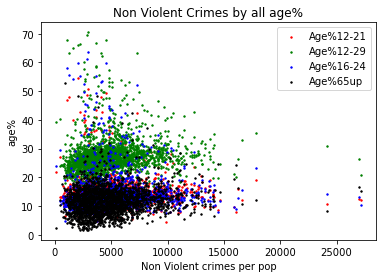

In [18]:
#Non violent crime by age%
ax1 = df.plot(x='nonViolPerPop', y='agePct12t21', kind='scatter', c='red', s=2, label='Age%12-21')
ax2 = df.plot(x='nonViolPerPop', y='agePct12t29', kind='scatter', c='green', s=2, label='Age%12-29', ax=ax1)
ax3 = df.plot(x='nonViolPerPop', y='agePct16t24', kind='scatter', c='blue', s=2, label='Age%16-24', ax=ax2)
ax4 = df.plot(x='nonViolPerPop', y='agePct65up', kind='scatter', c='black', s=2, label='Age%65up', ax=ax3)
plt.title('Non Violent Crimes by all age%')
plt.xlabel('Non Violent crimes per pop')
plt.ylabel('age%')
# we can observe age group 65 and above are non violent crimes

Text(0, 0.5, 'age%')

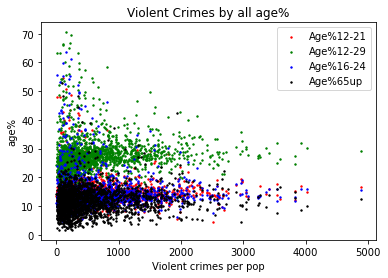

In [19]:
#Violent crime by age%
ax1 = df.plot(x='ViolentCrimesPerPop', y='agePct12t21', kind='scatter', c='red', s=2, label='Age%12-21')
ax2 = df.plot(x='ViolentCrimesPerPop', y='agePct12t29', kind='scatter', c='green', s=2, label='Age%12-29', ax=ax1)
ax3 = df.plot(x='ViolentCrimesPerPop', y='agePct16t24', kind='scatter', c='blue', s=2, label='Age%16-24', ax=ax2)
ax4 = df.plot(x='ViolentCrimesPerPop', y='agePct65up', kind='scatter', c='black', s=2, label='Age%65up', ax=ax3)
plt.title('Violent Crimes by all age%')
plt.xlabel('Violent crimes per pop')
plt.ylabel('age%')
# we can see 16-24 age groups have highest percentage of violent crime


In [20]:
import seaborn as sns

In [21]:
cities.head()

city   latitude   longitude state
0     NewYork  40.712784  -74.005941    NY
1  Greenville  35.612700  -77.366400    NC
2        Waco  31.549300  -97.146700    TX
3    Richmond  37.935800 -122.347700    CA
4  LosAngeles  34.052234 -118.243685    CA

In [22]:
crimedata = pd.merge(df,cities,how='outer') #merging df and cities dataframe

In [23]:
crimedata.head()

communityname state countyCode communityCode  fold  population  \
0  BerkeleyHeightstownship    NJ         39          5320   1.0     11980.0   
1  BerkeleyHeightstownship    NJ         39          5320   1.0     11980.0   
2  BerkeleyHeightstownship    NJ         39          5320   1.0     11980.0   
3  BerkeleyHeightstownship    NJ         39          5320   1.0     11980.0   
4  BerkeleyHeightstownship    NJ         39          5320   1.0     11980.0   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  larcPerPop  \
0            3.1          1.37         91.78           6.5  ...     1132.08   
1            3.1          1.37         91.78           6.5  ...     1132.08   
2            3.1          1.37         91.78           6.5  ...     1132.08   
3            3.1          1.37         91.78           6.5  ...     1132.08   
4            3.1          1.37         91.78           6.5  ...     1132.08   

   autoTheft  autoTheftPerPop  arsons  arsonsPerPop  ViolentCrimesPerPop  \
0         16           131.26       2         16.41                41.02   
1         16           131.26       2         16.41                41.02   
2         16           131.26       2         16.41                41.02   
3         16           131.26       2         16.41                41.02   
4         16           131.26       2         16.41                41.02   

   nonViolPerPop                  city   latitude  longitude  
0        1394.59         Pleasantville  39.389800 -74.524000  
1        1394.59                Newark  40.735657 -74.172367  
2        1394.59            JerseyCity  40.728157 -74.077642  
3        1394.59  CityofOrangetownship  40.770600 -74.232600  
4        1394.59     Irvingtontownship  40.726300 -74.228600  

[5 rows x 150 columns]

In [24]:
# checking if percentage of nans related to that data was collected by states but not by cities
too_nan = [col for col in df.columns if df[col].isna().sum()/df.shape[0] > 0.5]
for state in df['state'].unique():
    for col in too_nan:
        size = df[df['state'] == state][col].shape[0]
        n_notnan = size - df[df['state'] == state][col].isna().sum()
        uniques = df[df['state'] == state][col].unique().shape[0]
        print('Size of state: {0:3.0f}, not NaNs: {1:3.0f}, unique values in current column: {2:3.0f}'.format(size, n_notnan, uniques))

# so if this was true there should be only one not-nan

Size of state: 211, not NaNs: 211, unique values in current column:  21
Size of state: 211, not NaNs: 211, unique values in current column: 211
Size of state: 211, not NaNs:  32, unique values in current column:  29
Size of state: 211, not NaNs:  32, unique values in current column:  33
Size of state: 211, not NaNs:  32, unique values in current column:  29
Size of state: 211, not NaNs:  32, unique values in current column:  33
Size of state: 211, not NaNs:  32, unique values in current column:  32
Size of state: 211, not NaNs:  32, unique values in current column:  33
Size of state: 211, not NaNs:  32, unique values in current column:  33
Size of state: 211, not NaNs:  32, unique values in current column:  33
Size of state: 211, not NaNs:  32, unique values in current column:  33
Size of state: 211, not NaNs:  32, unique values in current column:  33
Size of state: 211, not NaNs:  32, unique values in current column:  28
Size of state: 211, not NaNs:  32, unique values in current colu

Size of state: 123, not NaNs:  17, unique values in current column:  18
Size of state: 123, not NaNs:  17, unique values in current column:  14
Size of state: 123, not NaNs:  17, unique values in current column:  18
Size of state: 123, not NaNs:  17, unique values in current column:  18
Size of state: 123, not NaNs:  17, unique values in current column:   4
Size of state: 123, not NaNs:  17, unique values in current column:  18
Size of state:  48, not NaNs:   1, unique values in current column:   2
Size of state:  48, not NaNs:   0, unique values in current column:   1
Size of state:  48, not NaNs:  10, unique values in current column:  11
Size of state:  48, not NaNs:  10, unique values in current column:  11
Size of state:  48, not NaNs:  10, unique values in current column:  11
Size of state:  48, not NaNs:  10, unique values in current column:  11
Size of state:  48, not NaNs:  10, unique values in current column:  10
Size of state:  48, not NaNs:  10, unique values in current colu

Size of state:  71, not NaNs:  18, unique values in current column:  19
Size of state:  71, not NaNs:  18, unique values in current column:  19
Size of state:  71, not NaNs:  18, unique values in current column:  19
Size of state:  71, not NaNs:  18, unique values in current column:  19
Size of state:  71, not NaNs:  18, unique values in current column:  18
Size of state:  71, not NaNs:  18, unique values in current column:  17
Size of state:  71, not NaNs:  18, unique values in current column:   3
Size of state:  71, not NaNs:  18, unique values in current column:  18
Size of state:  71, not NaNs:  18, unique values in current column:  13
Size of state:  71, not NaNs:  18, unique values in current column:   9
Size of state:  71, not NaNs:  18, unique values in current column:  19
Size of state:  71, not NaNs:  18, unique values in current column:  16
Size of state:  71, not NaNs:  18, unique values in current column:  19
Size of state:  71, not NaNs:  18, unique values in current colu

Size of state:   7, not NaNs:   0, unique values in current column:   1
Size of state:   7, not NaNs:   0, unique values in current column:   1
Size of state:   7, not NaNs:   0, unique values in current column:   1
Size of state:   7, not NaNs:   0, unique values in current column:   1
Size of state:   7, not NaNs:   0, unique values in current column:   1
Size of state:   7, not NaNs:   0, unique values in current column:   1
Size of state:   7, not NaNs:   0, unique values in current column:   1
Size of state:   7, not NaNs:   0, unique values in current column:   1
Size of state:   7, not NaNs:   0, unique values in current column:   1
Size of state:   7, not NaNs:   0, unique values in current column:   1
Size of state:   7, not NaNs:   0, unique values in current column:   1
Size of state:   7, not NaNs:   0, unique values in current column:   1
Size of state:   7, not NaNs:   0, unique values in current column:   1
Size of state:   7, not NaNs:   0, unique values in current colu

Size of state:  60, not NaNs:   6, unique values in current column:   6
Size of state:  60, not NaNs:   6, unique values in current column:   6
Size of state:  60, not NaNs:   6, unique values in current column:   4
Size of state:  60, not NaNs:   6, unique values in current column:   7
Size of state:  60, not NaNs:   6, unique values in current column:   7
Size of state:  60, not NaNs:   6, unique values in current column:   6
Size of state:  60, not NaNs:   6, unique values in current column:   7
Size of state:  60, not NaNs:   6, unique values in current column:   7
Size of state:  60, not NaNs:   6, unique values in current column:   7
Size of state:  60, not NaNs:   6, unique values in current column:   7
Size of state:  60, not NaNs:   6, unique values in current column:   4
Size of state:  60, not NaNs:   6, unique values in current column:   7
Size of state:  35, not NaNs:   0, unique values in current column:   1
Size of state:  35, not NaNs:   0, unique values in current colu

Size of state:  14, not NaNs:   2, unique values in current column:   3
Size of state:  26, not NaNs:  26, unique values in current column:   5
Size of state:  26, not NaNs:  26, unique values in current column:  26
Size of state:  26, not NaNs:   5, unique values in current column:   6
Size of state:  26, not NaNs:   5, unique values in current column:   6
Size of state:  26, not NaNs:   5, unique values in current column:   6
Size of state:  26, not NaNs:   5, unique values in current column:   6
Size of state:  26, not NaNs:   5, unique values in current column:   6
Size of state:  26, not NaNs:   5, unique values in current column:   6
Size of state:  26, not NaNs:   5, unique values in current column:   6
Size of state:  26, not NaNs:   5, unique values in current column:   6
Size of state:  26, not NaNs:   5, unique values in current column:   6
Size of state:  26, not NaNs:   5, unique values in current column:   6
Size of state:  26, not NaNs:   5, unique values in current colu

Size of state:  12, not NaNs:   1, unique values in current column:   2
Size of state:  12, not NaNs:   1, unique values in current column:   2
Size of state:  12, not NaNs:   1, unique values in current column:   2
Size of state:  12, not NaNs:   1, unique values in current column:   2
Size of state:  10, not NaNs:   0, unique values in current column:   1
Size of state:  10, not NaNs:   0, unique values in current column:   1
Size of state:  10, not NaNs:   1, unique values in current column:   2
Size of state:  10, not NaNs:   1, unique values in current column:   2
Size of state:  10, not NaNs:   1, unique values in current column:   2
Size of state:  10, not NaNs:   1, unique values in current column:   2
Size of state:  10, not NaNs:   1, unique values in current column:   2
Size of state:  10, not NaNs:   1, unique values in current column:   2
Size of state:  10, not NaNs:   1, unique values in current column:   2
Size of state:  10, not NaNs:   1, unique values in current colu

In [25]:
#Now lets investigate if it better to drop columns with a lot of nans than fill them
#drop nan columns or rows, fit the model and tune it parameters
#fill nans and do the same
#using tree-based models define main founders in ViolentCrimesPerPop
#draw these founders on map to make some  graphics

In [26]:
df.shape

(2215, 147)

In [27]:
#1. Dropping
df_dropped = df.dropna(thresh=df.shape[0]*0.6,how='all',axis=1) # drop columns with more than 60% nan values
df_dropped.shape

(2215, 123)

In [28]:
for col in df_dropped.columns:
    try:
        filler = df_dropped[col].describe()['top']
    except:
        filler = df_dropped[col].describe()['mean']
    df_dropped.loc[:,col] = df_dropped.fillna(filler)
#filling nan with mean of top values

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\pandas\core\indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)
D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\pandas\core\indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)
D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\pandas\core\indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [29]:
df_dropped.head()

communityname state  fold  population  householdsize  \
0  BerkeleyHeightstownship    NJ     1       11980           3.10   
1           Marpletownship    PA     1       23123           2.82   
2               Tigardcity    OR     1       29344           2.43   
3         Gloversvillecity    NY     1       16656           2.40   
4              Bemidjicity    MN     1       11245           2.76   

   racepctblack  racePctWhite  racePctAsian  racePctHisp  agePct12t21  ...  \
0          1.37         91.78          6.50         1.88        12.47  ...   
1          0.80         95.57          3.44         0.85        11.01  ...   
2          0.74         94.33          3.43         2.35        11.36  ...   
3          1.70         97.35          0.50         0.70        12.55  ...   
4          0.53         89.16          1.17         0.52        24.46  ...   

   burglaries  burglPerPop  larcenies  larcPerPop  autoTheft  autoTheftPerPop  \
0          14       114.85        138     1132.08         16           131.26   
1          57       242.37        376     1598.78         26           110.55   
2         274       758.14       1797     4972.19        136           376.30   
3         225      1301.78        716     4142.56         47           271.93   
4          91       728.93       1060     8490.87         91           728.93   

   arsons  arsonsPerPop  ViolentCrimesPerPop  nonViolPerPop  
0       2         16.41                41.02        1394.59  
1       1          4.25               127.56        1955.95  
2      22         60.87               218.59        6167.51  
3       0          0.00               306.64        2246.14  
4       5         40.05               223.06        9988.79  

[5 rows x 123 columns]

In [30]:
target = df_dropped['ViolentCrimesPerPop']
df_dropped = df_dropped.drop(columns=['communityname', 'state', 'fold', 'ViolentCrimesPerPop', 'nonViolPerPop'])

In [31]:
cols = ['HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos','PctUnemployed','PctEmploy','murdPerPop','rapesPerPop','robbbPerPop','assaultPerPop','ViolentCrimesPerPop','burglPerPop','larcPerPop','autoTheftPerPop','arsonsPerPop','nonViolPerPop']
crimedata_study = df.filter(cols, axis=1)

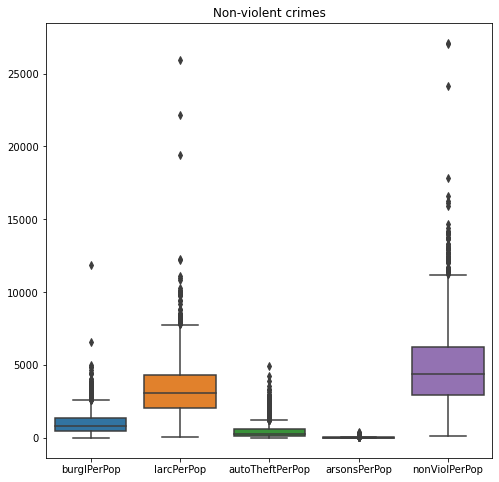

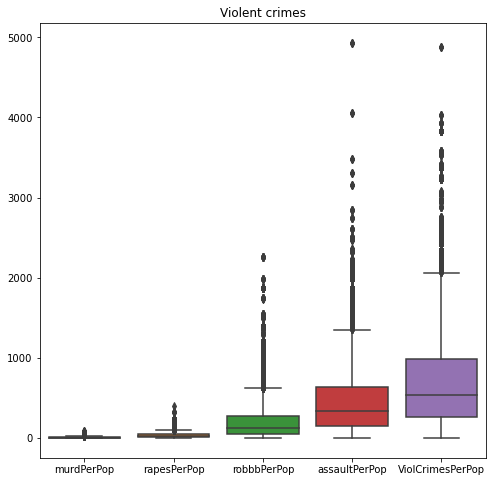

In [32]:
#Exploratory Data Analysis of Response Variables

#Boxplot of non violent crime variables
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
nonViolent = crimedata_study[cols[12:17]]
xticklablesNV = ['burglPerPop','larcPerPop','autoTheftPerPop','arsonsPerPop','nonViolPerPop']
sns.boxplot(data=nonViolent)
ax.set(title="Non-violent crimes")
ax.set_xticklabels(xticklablesNV)
plt.show()


#Boxplot of Violent crime variables
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
Violent = crimedata[cols[7:12]]
xticklablesV = ['murdPerPop','rapesPerPop','robbbPerPop','assaultPerPop','ViolCrimesPerPop']
sns.boxplot(data=Violent)
ax.set(title="Violent crimes")
ax.set_xticklabels(xticklablesV)
plt.show()

<AxesSubplot:title={'center':'HispPerCap'}, ylabel='Density'>

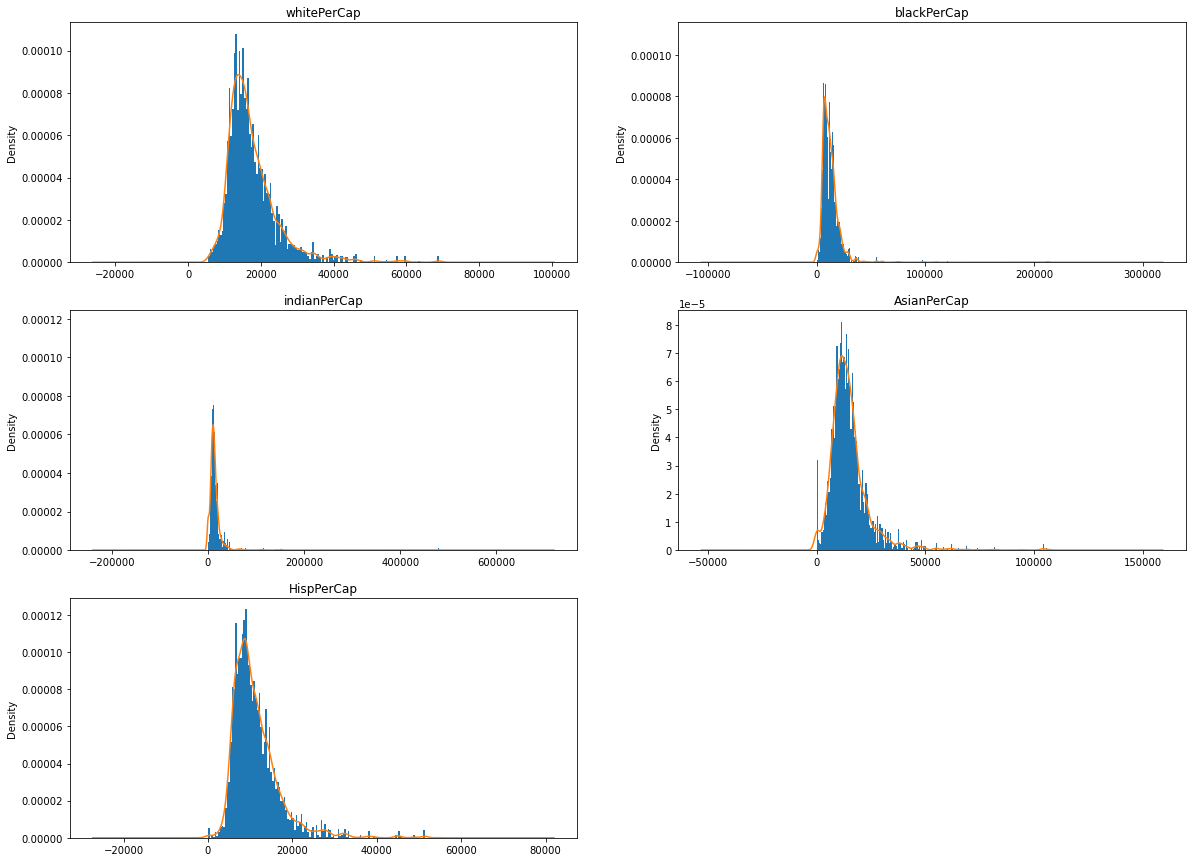

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
plt.title('whitePerCap')
crimedata['whitePerCap'].hist(bins='fd', density=True)
crimedata['whitePerCap'].plot(kind='kde')


plt.subplot(3,2,2)
plt.title('blackPerCap')
crimedata['blackPerCap'].hist(bins='fd', density=True)
crimedata['blackPerCap'].plot(kind='kde')

plt.subplot(3,2,3)
plt.title('indianPerCap')
crimedata['indianPerCap'].hist(bins='fd', density=True)
crimedata['indianPerCap'].plot(kind='kde')



plt.subplot(3,2,4)
plt.title('AsianPerCap')

crimedata['AsianPerCap'].hist(bins='fd', density=True)
crimedata['AsianPerCap'].plot(kind='kde')


plt.subplot(3,2,5)

plt.title('HispPerCap')
crimedata['HispPerCap'].hist(bins='fd', density=True)
crimedata['HispPerCap'].plot(kind='kde')
# we can see hispercap and whitepercap and asianpercap have highest violent rates distribution

In [34]:
import sklearn
from sklearn import linear_model

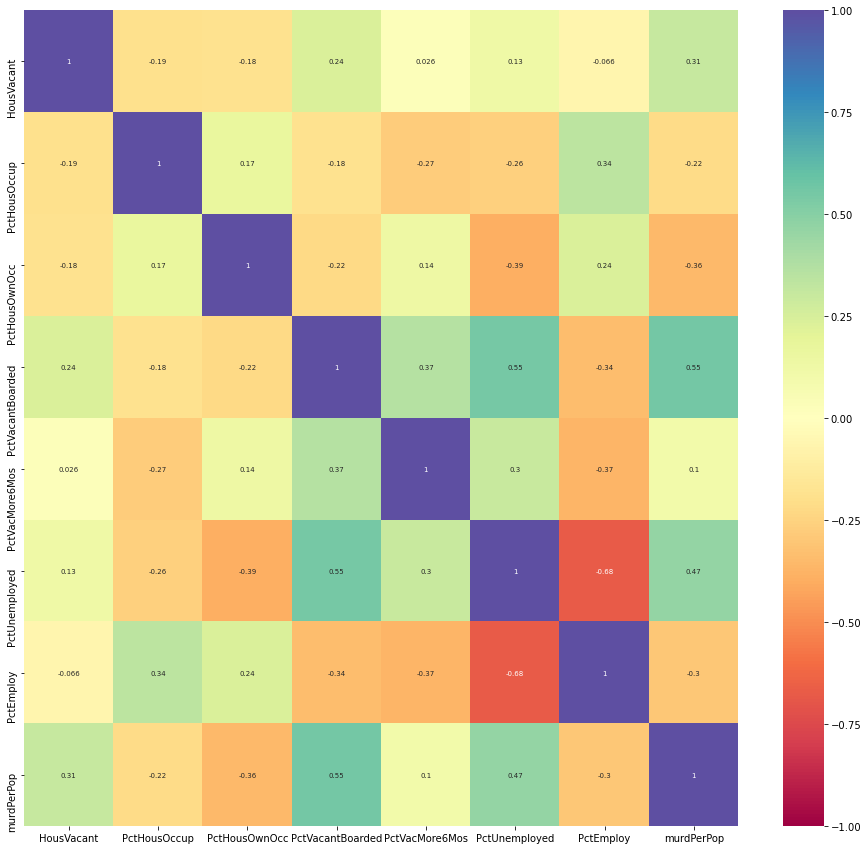

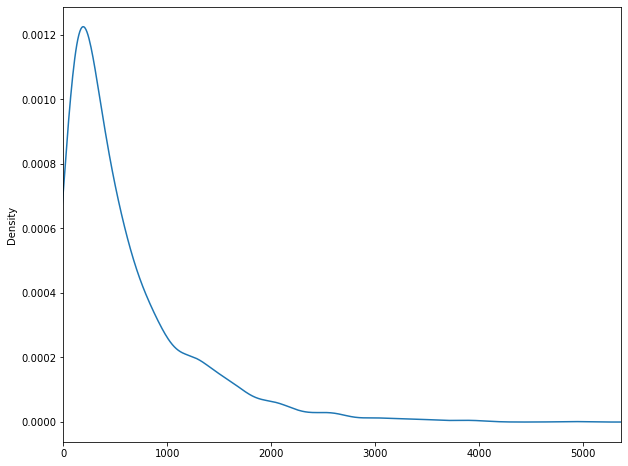

In [35]:
### Find out the correlation between explanatory and response under study variables. Indepentdent variables under study is limited
### to Income and employment considering the huge number of variables in the dataset
crimedata_reg = crimedata_study.drop(['burglPerPop','larcPerPop','autoTheftPerPop','arsonsPerPop','nonViolPerPop'],axis=1)
crimedata_reg_corr = crimedata_reg.corr()

### correlation matrix plot
plt.figure(figsize=(16,15))
sns.heatmap(crimedata_reg_corr,annot=True,annot_kws={"size": 7},vmin=-1.0, vmax=1.0,cmap="Spectral")

## "ViolentCrimesPerPop" Density plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax= crimedata_reg['ViolentCrimesPerPop'].plot(kind="kde")
plt.xlim(crimedata_reg['ViolentCrimesPerPop'].min(), crimedata_reg['ViolentCrimesPerPop'].max()*1.1)
plt.show()

## We can see that the density plot is right skewed and further from the boxplot for the response variable "ViolentCrimesPerPop"
## shows the spread of  many outlier data points above the third quartile




In [37]:
#2. Filling
df_filled = df.copy()
for col in df_filled.columns:
    try:
        filler = df_filled[col].describe()['mean']
    except:
        filler = df_filled[col].describe()['top']
    df_filled.loc[:,col] = df_filled.fillna(filler)
df_filled.head()

communityname state  countyCode  communityCode  fold  population  \
0  BerkeleyHeightstownship    NJ          39           5320     1       11980   
1           Marpletownship    PA          45          47616     1       23123   
2               Tigardcity    OR           3          21000     1       29344   
3         Gloversvillecity    NY          35          29443     1       16656   
4              Bemidjicity    MN           7           5068     1       11245   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  burglaries  \
0           3.10          1.37         91.78          6.50  ...          14   
1           2.82          0.80         95.57          3.44  ...          57   
2           2.43          0.74         94.33          3.43  ...         274   
3           2.40          1.70         97.35          0.50  ...         225   
4           2.76          0.53         89.16          1.17  ...          91   

   burglPerPop  larcenies  larcPerPop  autoTheft  autoTheftPerPop  arsons  \
0       114.85        138     1132.08         16           131.26       2   
1       242.37        376     1598.78         26           110.55       1   
2       758.14       1797     4972.19        136           376.30      22   
3      1301.78        716     4142.56         47           271.93       0   
4       728.93       1060     8490.87         91           728.93       5   

   arsonsPerPop  ViolentCrimesPerPop  nonViolPerPop  
0         16.41                41.02        1394.59  
1          4.25               127.56        1955.95  
2         60.87               218.59        6167.51  
3          0.00               306.64        2246.14  
4         40.05               223.06        9988.79  

[5 rows x 147 columns]

In [38]:
target = df_filled['ViolentCrimesPerPop']
df_filled = df_filled.drop(columns=['communityname', 'state', 'fold', 'ViolentCrimesPerPop', 'nonViolPerPop'])

In [39]:
crimedata_reg =df_filled.drop(['burglPerPop','larcPerPop','autoTheftPerPop','arsonsPerPop'],axis=1)

# Multilinear regression with hyperparameter tuning

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [44]:
## Multiple Linear Regression of variables under study
## using statsmodel 
##X = sm.add_constant(X)
##mregmodel = sm.OLS(y,X).fit()
##print (mregmodel.summary())
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(crimedata_reg, target, test_size=0.25,random_state=1)
# fit a model
lm = linear_model.LinearRegression()
mmodel = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
coefficients = mmodel.coef_
print("The coeffcients of our model is {}".format(coefficients))
intercept = mmodel.intercept_
print("The intercept for our model is {}".format(intercept))
print ("Linear model Train dataset score is {}".format(mmodel.score(X_train,y_train)))
print ("Linear model Test dataset score is {}".format(mmodel.score(X_test,y_test)))

##Linear regression using KFold Cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=0)
results = next(kf.split(df_filled), None)
X_train,y_train = df_filled.iloc[results[0]], target.iloc[results[0]]
X_test,y_test = df_filled.iloc[results[1]],target.iloc[results[1]]

lm = linear_model.LinearRegression()
mm_scores = cross_val_score(lm,crimedata_reg, target,cv=kf)
print ("Cross Validatation Score is {}".format(mm_scores))
print ("Cross Validatation Score mean is {}".format(mm_scores.mean()))
print ("Cross Validatation standard deviation is {}".format(mm_scores.std()))

The coeffcients of our model is [-5.33931481e-02 -2.79816127e-04 -5.13186775e-04  1.19971755e+02
 -4.67360445e+00 -1.76046896e-01 -2.02218773e+00  4.34551413e-01
 -5.71641497e-01 -7.81242215e+00 -2.88050426e+00 -1.38569319e+01
  2.07552760e-04 -4.67962849e-01 -3.76142010e-03  4.31037832e+00
 -2.00924990e+01 -6.50430634e+00  6.36146158e+00 -2.13701580e+01
  1.68469540e+00  5.28938638e-03 -2.31976672e-02  2.13867690e-02
  3.96538714e-04  1.05601361e-04  1.65124895e-03 -4.48479154e-04
  1.53134731e-03 -2.26115393e-03  2.42032904e+00  1.17689806e+01
 -6.73556684e+00 -4.46391343e-01 -2.86285576e+01 -4.98664702e+00
  1.38910354e+00  2.60721924e+00 -4.71246189e+00 -6.36730461e-01
  2.01803634e+01 -4.60299799e+00  3.14232173e+01 -7.88151504e+01
  6.66595252e+02  7.83072012e+00 -2.39515409e+01 -2.94768906e+00
  3.70171892e+00  8.31006880e-01  3.68642453e-01  5.04698448e-04
 -2.07989983e+01 -3.04511673e-04  1.42207565e+00  2.72126307e-01
  4.82910453e-01 -5.25711103e-01 -3.56276505e+01  4.504266

# gradient boosting with hyperparameter tuning

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV as rscv
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_dropped, target, random_state=32)

model = GradientBoostingRegressor()
param_grid = {'learning_rate':[0.001, 0.01, 0.1], 'n_estimators':[50,100,200], 'max_depth':[2,4,7]}
cv = rscv(model, param_grid, n_iter=6, verbose=1).fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.8min finished


In [46]:
cv.score(X_train, y_train), cv.score(X_test, y_test)

(0.9933668895493607, 0.9772819760029307)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df_filled, target, random_state=32)

model = GradientBoostingRegressor()
param_grid = {'learning_rate':[0.001, 0.01, 0.1], 'n_estimators':[50,100,200], 'max_depth':[2,4,7]}
cv = rscv(model, param_grid, n_iter=6, verbose=1).fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.3min finished


In [48]:
cv.score(X_train, y_train), cv.score(X_test, y_test)

(0.9641756205901846, 0.9531157695870459)

In [49]:
#3. Feature importances
#Well, it doesn't matter to drop it or simply fill columns Let's define most important features by filled model

In [50]:
cv.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=200)

In [52]:
model = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
model.fit(X_train, y_train)
print(model.score(X_train, y_train), model.score(X_test, y_test))

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\sklearn\ensemble\_gb.py:304: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  warnings.warn("The parameter 'presort' is deprecated and has no "


0.9641756205901846 0.9526605175787413


In [53]:
imps = pd.Series(model.feature_importances_)
feas = pd.Series(df.drop(columns=['communityname', 'state', 'fold', 'ViolentCrimesPerPop', 'nonViolPerPop']).columns)
FeasImps = pd.DataFrame(columns=['features', 'importances', 'importances by %'])
FeasImps['features'] = feas
FeasImps['importances'] = imps
FeasImps['importances by %'] = np.array(imps)*100

In [54]:
rapes_imp = FeasImps.iloc[129, 1]
kids_imp = FeasImps[FeasImps['features'] == 'PctKidsBornNeverMar']['importances'].values[0]
burgl_imp = FeasImps[FeasImps['features'] == 'burglPerPop']['importances'].values[0]
assault_imp = FeasImps[FeasImps['features'] == 'assaultPerPop']['importances'].values[0]
FeasImps.sort_values('importances', ascending=False).head(4)

features  importances  importances by %
133  assaultPerPop     0.772116         77.211577
131    robbbPerPop     0.118027         11.802706
129    rapesPerPop     0.047757          4.775721
128          rapes     0.037384          3.738367

In [55]:
#Next features have less than 1% of impact on model so it's not neccesary to watch them Now let's calculate the most correlated to ViolentCrimesPerPop features

In [56]:
corra = []
crimes = pd.Series(target)
for col in df_filled.columns:
    try:
        corra.append(crimes.corr(df_filled[col]))
    except Exception as e:
        corra.append(0)
corrs = pd.DataFrame(columns=['features', 'correlation'])
corrs['features'] = pd.Series(df_filled.columns)
corrs['correlation'] = pd.Series(corra)

In [57]:
crimes.corr(df_filled[df_filled.columns[5]])

-0.6467277542972725

In [58]:
kids_corr = corrs.iloc[52, 1]
burgl_corr = corrs.iloc[135, 1]
assault_corr = corrs.iloc[133, 1]
rapes_corr = corrs.iloc[129, 1]
corrs.sort_values('correlation', ascending=False).head(4)

features  correlation
133        assaultPerPop     0.844484
131          robbbPerPop     0.784273
52   PctKidsBornNeverMar     0.680713
135          burglPerPop     0.674820

In [59]:
#Let's display on map top 10 cities with high rate of violent crimes, PctKidsBornNeverMar, rapesPerPop, assaultPerPop and burglPerPop

<ipython-input-60-fe397dd5169e>:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  longitude=pd.Series(); latitude=pd.Series()
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have pr

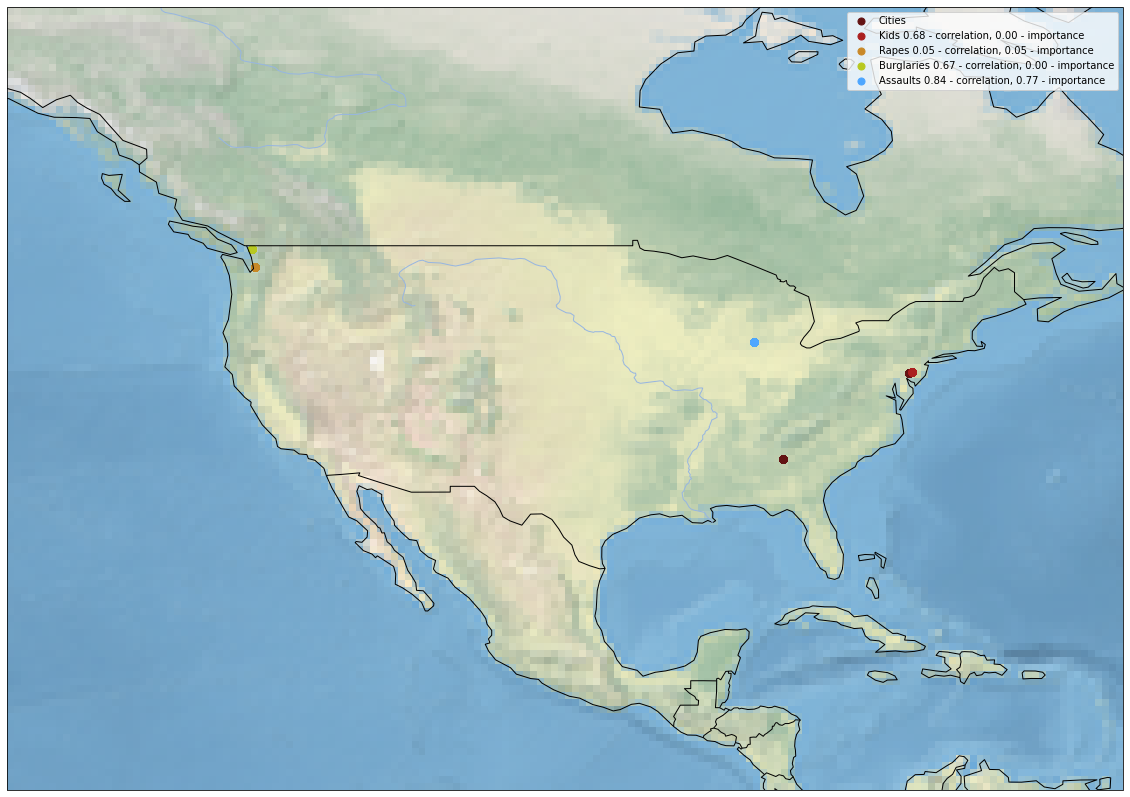

In [60]:
ax = plt.figure(figsize=(20,20)).add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent((-140,-60,10,60))#left right bottom top
ax.add_feature(fs.BORDERS)
ax.add_feature(fs.COASTLINE)
ax.add_feature(fs.RIVERS)
#ax.add_feature(fs.LAKES)

def find_top_coords(inces):
    city_list = crimedata.iloc[inces, 0]
    city_list = list(map(lambda x: x[:-4], city_list))
    longitude=pd.Series(); latitude=pd.Series()
    for city in city_list:
        lon = crimedata[crimedata['city'] == city]['longitude']
        lat = crimedata[crimedata['city'] == city]['latitude']
        longitude = longitude.append(lon)
        latitude = latitude.append(lat)
    return longitude, latitude

ssize=50

# cities
top10crimes = crimedata[~crimedata['ViolentCrimesPerPop'].isna()]['ViolentCrimesPerPop'].sort_values()[-10:]
top10crimes_lon, top10crimes_lat = find_top_coords(top10crimes.index)
ax.scatter(top10crimes_lon, top10crimes_lat, s=ssize, c=np.array([99,19,19])/255, label='Cities')

# kids
top10kids = crimedata[~crimedata['PctKidsBornNeverMar'].isna()]['PctKidsBornNeverMar'].sort_values(ascending=False)[:10]
top10kids_lon, top10kids_lat = find_top_coords(top10kids.index)
ax.scatter(top10kids_lon, top10kids_lat, s=ssize, c=np.array([171,32,32])/255,
           label='Kids {0:.2f} - correlation, {1:.2f} - importance'.format(kids_corr, kids_imp))

# rapes
top10rapes = crimedata[~crimedata['rapesPerPop'].isna()]['rapesPerPop'].sort_values()[-10:]
top10rapes_lon, top10rapes_lat = find_top_coords(top10rapes.index)
ax.scatter(top10rapes_lon, top10rapes_lat, s=ssize, c=np.array([201,137,40])/255,
           label='Rapes {0:.2f} - correlation, {1:.2f} - importance'.format(rapes_imp, rapes_imp))

# burglaries
top10burgl = crimedata[~crimedata['burglPerPop'].isna()]['burglPerPop'].sort_values()[-10:]
top10burgl_lon, top10burgl_lat = find_top_coords(top10burgl.index)
ax.scatter(top10burgl_lon, top10burgl_lat, s=ssize, c=np.array([184,201,32])/255,
           label='Burglaries {0:.2f} - correlation, {1:.2f} - importance'.format(burgl_corr, burgl_imp))

# assaults
top10assault = crimedata[~crimedata['assaultPerPop'].isna()]['assaultPerPop'].sort_values()[-10:]
top10assault_lon, top10assault_lat = find_top_coords(top10assault.index)
ax.scatter(top10assault_lon, top10assault_lat, s=ssize, c=np.array([77,166,255])/255,
           label='Assaults {0:.2f} - correlation, {1:.2f} - importance'.format(assault_corr, assault_imp))

ax.stock_img()
plt.legend()
plt.show()

In [61]:
import plotly.graph_objects as go

fig = go.Figure()

colors=['rgb(99,19,19)', 'rgb(171,32,32)', 'rgb(201,137,40)', 'rgb(184,201,32)', 'rgb(210,242,0)']

def merge_labels(name, inces):
    labels=[]
    cities = crimedata.iloc[inces,0]
    states = crimedata.iloc[inces,1]
    for city, state in zip(cities, states):
        labels.append(name+' in '+str(city[:-4])+', '+str(state))
    return labels

stats=((top10crimes_lon, top10crimes_lat, top10crimes, merge_labels('Violent crimes', top10crimes.index), 'Violent crimes'),
        (top10kids_lon, top10kids_lat, top10kids, merge_labels('Kids', top10kids.index), 'Kids born to never married'),
        (top10rapes_lon, top10rapes_lat, top10rapes, merge_labels('Rapes', top10rapes.index), 'Rapes'),
        (top10burgl_lon, top10burgl_lat, top10burgl, merge_labels('Burglaries', top10burgl.index), 'Burglaries'),
        (top10assault_lon, top10assault_lat, top10assault, merge_labels('Assaults', top10assault.index), 'Assaults'))

for i, stat in enumerate(stats):
    fig.add_trace(go.Scattergeo(
        lon = stat[0], lat = stat[1],
        #text = stat[2].apply(lambda x: round(x, 3)),
        text = pd.Series([str(v)+' '+str(d) for v,d in zip(stat[2], stat[3])]),
        name = stat[4],
        marker = dict(
            size = list(20*stat[2].values/stat[2].max()),
            color=colors[i],
            line_width=0
        )
    ))
    

fig.update_layout(
    title_text = 'Interactive map demonstraiting Violent Crimes and it\'s reasons (all values calculated per 100k)',
    geo=dict(
        resolution=50,
        scope='north america',
        showframe=True,
        showcoastlines=True,
        showland=True,
        landcolor='darkgray',
        countrycolor = 'black',
        coastlinecolor='black',
        #projection_type='equirectangular', #-makes a map  more compressed
        lonaxis_range=[ -120.0, -65.0],
        lataxis_range=[ 25.0, 55.0],
        domain = dict(x=[0, 1], y=[0, 1]),
        bgcolor='rgba(173,217,255, 0.7)'
    )
)    
    
fig.show()

# #linear regression with forward selection

In [62]:
X_train, X_test, y_train, y_test = train_test_split(df_filled, target, random_state=32)

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [144]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

clf = LinearRegression()
clf.fit(X_train,y_train)
# Build step forward feature selection
sfs1 = sfs(clf,k_features = 10,forward=True,floating=False, scoring='r2',cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)
sfs1.subsets_

{1: {'feature_idx': (133,),
  'cv_scores': array([0.71556653, 0.8380456 , 0.7791119 , 0.69714946, 0.55819706]),
  'avg_score': 0.7176141100335214,
  'feature_names': ('assaultPerPop',)},
 2: {'feature_idx': (131, 133),
  'cv_scores': array([0.6948978 , 0.96022077, 0.88134771, 0.85008845, 0.74486359]),
  'avg_score': 0.8262836638762758,
  'feature_names': ('robbbPerPop', 'assaultPerPop')},
 3: {'feature_idx': (129, 131, 133),
  'cv_scores': array([0.75136436, 0.94141855, 0.90626767, 0.87682654, 0.79150519]),
  'avg_score': 0.8534764626414105,
  'feature_names': ('rapesPerPop', 'robbbPerPop', 'assaultPerPop')},
 4: {'feature_idx': (110, 129, 131, 133),
  'cv_scores': array([0.76781526, 0.93932322, 0.91356858, 0.86641529, 0.80049322]),
  'avg_score': 0.857523116144268,
  'feature_names': ('PctPolicBlack',
   'rapesPerPop',
   'robbbPerPop',
   'assaultPerPop')},
 5: {'feature_idx': (34, 110, 129, 131, 133),
  'cv_scores': array([0.78125667, 0.9388965 , 0.9172371 , 0.87162265, 0.79383854])

In [75]:
#we can access the indices of the 3 best features directly via the k_feature_idx_ attribute

In [76]:
sfs1.k_feature_idx_

(31, 34, 38, 85, 91, 110, 122, 129, 131, 133)

In [77]:
sfs1.k_feature_names_

('PctLess9thGrade',
 'PctUnemployed',
 'PctOccupManu',
 'RentLowQ',
 'MedOwnCostPctInc',
 'PctPolicBlack',
 'LemasPctPolicOnPatr',
 'rapesPerPop',
 'robbbPerPop',
 'assaultPerPop')

In [78]:
sfs1.k_score_

0.8726177720088071

In [127]:
sfs1.cv

5

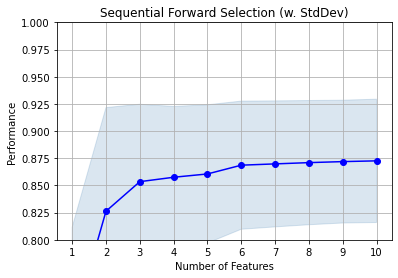

In [79]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

# LASSO REGRESSION

In [80]:
X_train, X_test, y_train, y_test = train_test_split(df_filled, target, random_state=32)

In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from numpy import absolute
from numpy import mean
from numpy import std

In [82]:
# define model
model1 = Lasso(alpha=1.0)
model1.fit(df_filled,target)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model1, df_filled,target, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 35851192.44887522, tolerance: 77992.75744748325



Mean MAE: 109.252 (9.270)


In [83]:
#we can clearly see we can't use lasso as the MAE is very huge and is not feasible

# ridge regression

In [84]:
from sklearn.linear_model import LinearRegression, Ridge
# model evaluation
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import preprocessing

In [85]:
ridge_reg = Ridge(alpha=0)

ridge_reg.fit(X_train, y_train)
ridge_df = pd.DataFrame({'variable':df_filled, 'estimate': ridge_reg.coef_})
ridge_train_pred = []
ridge_test_pred = []


In [86]:
# iterate lambdas
for alpha in np.arange(0, 200, 1):
    # training
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    ridge_df[var_name] = ridge_reg.coef_
    # prediction
    ridge_train_pred.append(ridge_reg.predict(X_train))
    ridge_test_pred.append(ridge_reg.predict(X_test))


D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=2.29646e-19): result may not be accurate.

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=4.59251e-19): result may not be accurate.

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=6.87032e-19): result may not be accurate.

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=9.18295e-19): result may not be accurate.

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=1.14671e-18): result may not be accurate.

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\sklearn\linear_model\_ridge

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=1.05444e-17): result may not be accurate.

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=1.07927e-17): result may not be accurate.

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=8.62639e-18): result may not be accurate.

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=8.79273e-18): result may not be accurate.

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=8.95923e-18): result may not be accurate.

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\sklearn\linear_model\_ridge

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=1.65572e-17): result may not be accurate.

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=1.67282e-17): result may not be accurate.

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=1.68993e-17): result may not be accurate.

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=1.70705e-17): result may not be accurate.

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=1.72418e-17): result may not be accurate.

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\sklearn\linear_model\_ridge

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=2.43289e-17): result may not be accurate.

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=2.45032e-17): result may not be accurate.

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=2.46776e-17): result may not be accurate.

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=2.4852e-17): result may not be accurate.

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=2.50264e-17): result may not be accurate.

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\sklearn\linear_model\_ridge.

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=3.34025e-17): result may not be accurate.

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=3.35765e-17): result may not be accurate.

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=3.37506e-17): result may not be accurate.

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=3.39246e-17): result may not be accurate.

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=3.40987e-17): result may not be accurate.

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\sklearn\linear_model\_ridge

In [87]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

Text(0, 0.5, 'MSE')

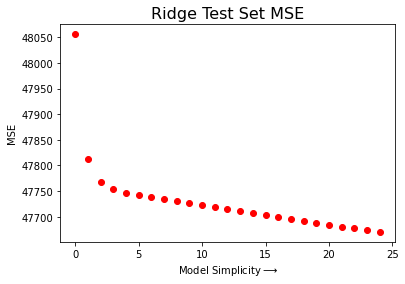

In [88]:
# MSE of Ridge and OLS
ridge_mse_test = [mean_squared_error(y_test, p) for p in ridge_test_pred]


# plot mse
plt.plot(ridge_mse_test[:25], 'ro')

plt.title("Ridge Test Set MSE", fontsize=16)
plt.xlabel("Model Simplicity$\longrightarrow$")
plt.ylabel("MSE")

In [89]:
ridge_mse_test

[48055.929607042686,
 47812.46758407187,
 47766.81819339913,
 47753.22438448026,
 47746.55519626233,
 47741.908065521995,
 47737.892785601936,
 47734.0460257203,
 47730.208218038715,
 47726.33177007223,
 47722.41239751309,
 47718.46209736529,
 47714.49793599302,
 47710.53734218429,
 47706.596218198916,
 47702.688304158146,
 47698.82509846981,
 47695.01601342086,
 47691.26861638108,
 47687.588887417325,
 47683.981462854135,
 47680.44985271058,
 47676.99662919457,
 47673.623587191825,
 47670.331879557954,
 47667.12213044962,
 47663.99453001239,
 47660.948913166256,
 47657.98482527842,
 47655.10157680318,
 47652.298288723665,
 47649.57393040156,
 47646.92735110286,
 47644.35730623252,
 47641.862479203985,
 47639.441499647386,
 47637.09295857152,
 47634.81542096344,
 47632.60743627114,
 47630.46754709423,
 47628.394296366154,
 47626.38623329417,
 47624.44191821024,
 47622.559926570866,
 47620.73885216471,
 47618.97730971692,
 47617.27393695581,
 47615.62739621122,
 47614.03637565817,
 4761

In [90]:
#The MSE values is high in the beginning  and exponentially reduces as the lambda value increases, 
#which means the model prediction is bad (more error) to a certain point.

In [91]:
#hence we cannot use ridge regression

# Least Angle Regression (LARS)

In [92]:
from sklearn.linear_model import LassoLars 
from sklearn.metrics import r2_score 

In [93]:
# Creating and fitting the regressor 
regressor = LassoLars(alpha = 0.1) 
regressor.fit(X_train, y_train) 
  
  
# Evaluating model 
prediction = regressor.predict(X_test) 
  
print(f"r2 Score of test set : {r2_score(y_test, prediction)}")

r2 Score of test set : 0.856917172903394


In [94]:
print(regressor.coef_)

[-5.14431278e-02 -5.61412697e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -6.52031128e-01  0.00000000e+00  4.46744528e-03
  0.00000000e+00 -5.80807065e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.37393906e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -5.74250434e-01  4.77487658e-01 -2.18819735e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.17575251e-04  7.06046887e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  5.86216882e+00
  0.00000000e+00  0.00000000e+00 -2.17580529e+01  0.00000000e+00
 -9.05951015e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.97981400e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

# PLS Regression model

In [95]:
from scipy.signal import savgol_filter

from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [110]:
def optimise_pls_cv(X, y, n_comp):
    # Define PLS object
    pls = PLSRegression(n_components=n_comp)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=10)

    # Calculate scores
    r2 = r2_score(y, y_cv)
    mse = mean_squared_error(y, y_cv)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_cv, r2, mse, rpd)

In [111]:
# test with 40 components
r2s = []
mses = []
rpds = []
xticks = np.arange(1, 41)
for n_comp in xticks:
    y_cv, r2, mse, rpd = optimise_pls_cv(df_filled,target, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)

In [112]:
# Plot the mses
def plot_metrics(vals, ylabel, objective):
    with plt.style.context('ggplot'):
        plt.plot(xticks, np.array(vals), '-v', color='blue', mfc='blue')
        if objective=='min':
            idx = np.argmin(vals)
        else:
            idx = np.argmax(vals)
        plt.plot(xticks[idx], np.array(vals)[idx], 'P', ms=10, mfc='red')

        plt.xlabel('Number of PLS components')
        plt.xticks = xticks
        plt.ylabel(ylabel)
        plt.title('PLS')

    plt.show()

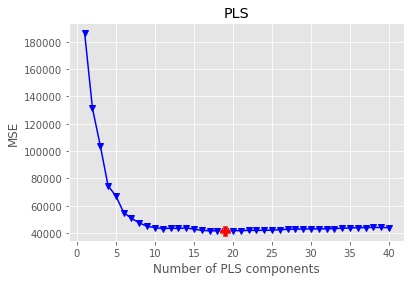

In [113]:
plot_metrics(mses, 'MSE', 'min')

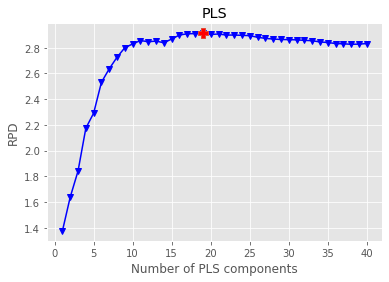

In [114]:
plot_metrics(rpds, 'RPD', 'max')

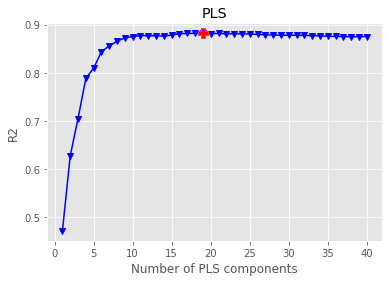

In [115]:
plot_metrics(r2s, 'R2', 'max')

In [116]:
#Notice that all the metrics confirm that 19 components is the best option. We now apply it to our solution.

In [117]:
y_cv, r2, mse, rpd = optimise_pls_cv(df_filled,target, 19)

In [118]:
print('R2: %0.4f, MSE: %0.4f, RPD: %0.4f' %(r2, mse, rpd))

R2: 0.8821, MSE: 41526.7869, RPD: 2.9126


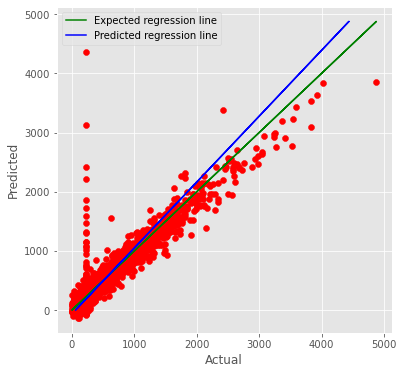

In [119]:
plt.figure(figsize=(6, 6))
with plt.style.context('ggplot'):
    plt.scatter(target, y_cv, color='red')
    plt.plot(target,target, '-g', label='Expected regression line')
    z = np.polyfit(target, y_cv, 1)
    plt.plot(np.polyval(z, target), target, color='blue', label='Predicted regression line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.plot()

In [120]:
#the PLS REGRESSION IS VERY GOOD BUT MSE IS VERY HIGH

# we can say the multilinear regression with hyper parameter tuning has better r2 value with 99.8 and least MSE .Hence we can say it is the best model